### 1) Introduction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CreditRisk_dataset.csv")

In [3]:
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
dept_emp_num =  employee.groupby('default')['default'].count()

In [6]:
negatif_age = data[data["age"] < 0]

In [7]:
negatif_age.head()

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


- Missing Value

In [8]:
data.loc[data.age<0,'age'] = data.age * -1
data.age.fillna(data.age.mean(), inplace = True)

In [9]:
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

### 2) Data Visualization

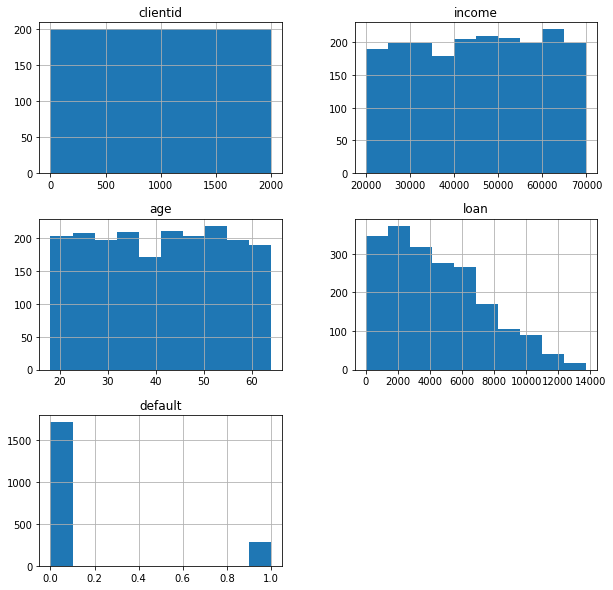

In [10]:
data.hist(figsize=(10, 10))
plt.show()

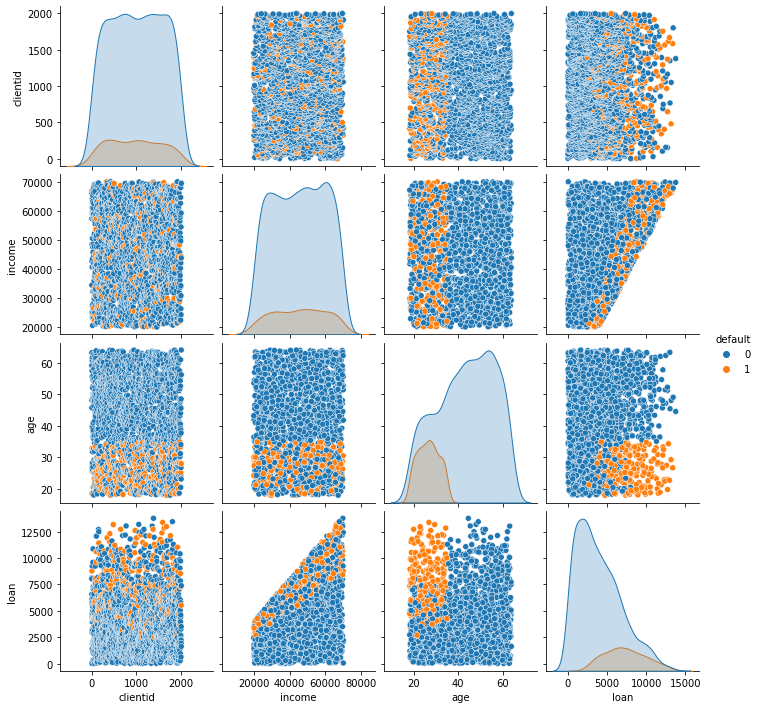

In [11]:
sns.pairplot(data, hue="default")
plt.show()

### 3) Data Preprocessing

- Data drop clientid 

In [12]:
data.drop(["clientid"], axis = 1, inplace = True)

In [13]:
x_data = data.drop(["default"], axis = 1)
y = data["default"]

- Normalization

In [14]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

- Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

### 4) Classification

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 4.1. Logistic Regression

In [17]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

y_head_logr = logr.predict(x_test)

#### 4.2. KNN

- finding n value

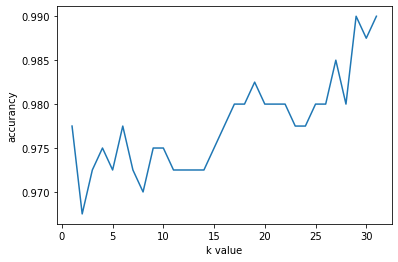

In [18]:
score_list = []
for each in range(1, 32):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1, 32), score_list)
plt.xlabel("k value")
plt.ylabel("accurancy")
plt.show()
    

In [19]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)
y_head_knn = knn.predict(x_test)

#### 4.3. Decision Tree

In [20]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_head_tree = tree.predict(x_test)

#### 4.4. Random Forrest Classification

In [21]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_head_rf = rf.predict(x_test)

#### Accuracy

In [22]:
print("Logistic Regression accuracy: {}".format(logr.score(x_test, y_test)))
print("KNN accuracy: {}".format(knn.score(x_test, y_test)))
print("Decision Tree accuracy: {}".format(tree.score(x_test, y_test)))
print("Random Rorest accuracy: {}".format(rf.score(x_test, y_test)))

Logistic Regression accuracy: 0.935
KNN accuracy: 0.9875
Decision Tree accuracy: 0.9925
Random Rorest accuracy: 0.99


#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

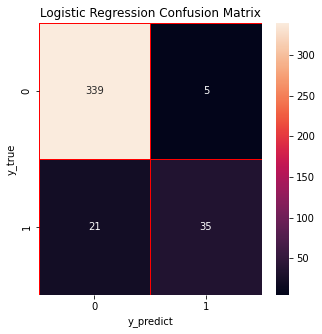

In [24]:
cm_log = confusion_matrix(y_test, y_head_logr)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_log, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

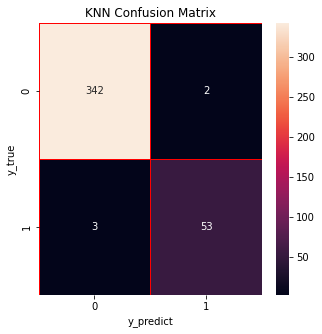

In [25]:
cm_knn = confusion_matrix(y_test, y_head_knn)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("KNN Confusion Matrix")
plt.show()

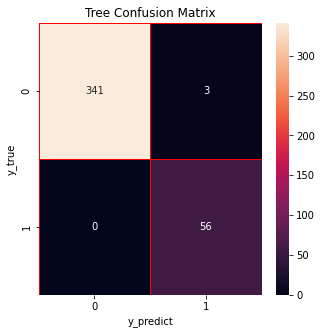

In [26]:
cm_tree = confusion_matrix(y_test, y_head_tree)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_tree, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("Tree Confusion Matrix")
plt.show()

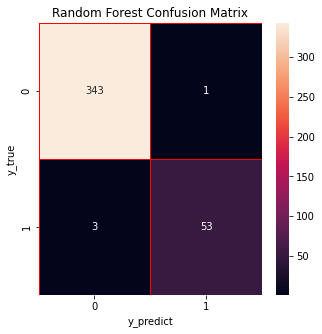

In [27]:
cm_rf = confusion_matrix(y_test, y_head_rf)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

#### Predict

In [28]:
data.head()

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


In [29]:
input_data0 = (66155.925095, 59.017015, 8106.532131)
input_data1 = (66952.688845, 18.584336, 8770.099235)

input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Normalization the data
n = [(input_data_reshape[0][0] - np.min(x_data["income"]))/(np.max(x_data["income"]) - np.min(x_data["income"])), 
    (input_data_reshape[0][1] - np.min(x_data["age"]))/(np.max(x_data["age"]) - np.min(x_data["age"])),
    (input_data_reshape[0][2] - np.min(x_data["loan"]))/(np.max(x_data["loan"]) - np.min(x_data["loan"]))]

n = np.asarray(n).reshape(-1, 1)
n = n.reshape(1, 3)

std_data = n

# Prediction
prediction = rf.predict(std_data)
#print(prediction)

if prediction == 0:
    print("customer will repay the loan or not.")
else:
    print('Person purchased the product')

Person purchased the product
